# Predicting Fetal Health from CTG-Data

## About

### Context

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

### Data

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

- Normal
- Suspect
- Pathological

### How to Use

Create a multiclass model to classify CTG features into the three fetal health states.


## Importing Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


## Exploring Data

In [16]:
data = pd.read_csv('data/fetal_health.csv')
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [18]:
data.shape

(2126, 22)

In [19]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


### The Features

- 'baseline value' baseline of the fetal heart rate (beats per minute)
- 'accelerations' per second
- 'fetal_movement' no. of fetal movements per second
- 'uterine_contractions' no. of uterine contractions per second
- 'light_decelerations' no. of light decelerations per second
- 'severe_decelerations' no. of severe decelerations per second
- 'prolongued_decelerations' no. of prolongued decelerations per second
- 'abnormal_short_term_variability' percentage of time with abnormal short term variability, high or low
- 'mean_value_of_short_term_variability'
- 'percentage_of_time_with_abnormal_long_term_variability'
- 'mean_value_of_long_term_variability'
- 'histogram_width'
- 'histogram_min'
- 'histogram_max'
- 'histogram_number_of_peaks'
- 'histogram_number_of_zeros'
- 'histogram_mode'
- 'histogram_mean'
- 'histgram_median'
- 'histgogram_variance'
- 'histogram_tendency'

### Target

- 'fetal_health' 3 categories: 1 (Normal), 2 (Suspect), 3 (Pathological)


In [20]:
print(data.fetal_health.value_counts())
print("Normalized:")
print(data.fetal_health.value_counts(normalize=True))

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64
Normalized:
1.0    0.778457
2.0    0.138758
3.0    0.082785
Name: fetal_health, dtype: float64


<AxesSubplot:xlabel='fetal_health', ylabel='count'>

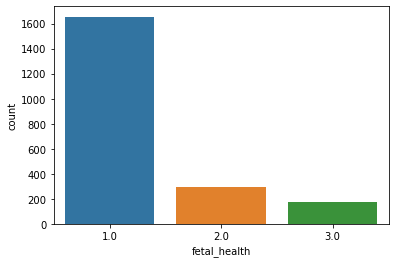

In [21]:
sns.countplot(data=data, x='fetal_health')

### Exploration Summary

There seems to be no missing data in the dataset. The features seem to be well-defined and the target is well-defined. There are features of high variance, as well as some of very low variance in the data set. All features are numerical, the target feature is a categorical variable with three categories. The target is categorical, with 3 classes: 1 (Normal), 2 (Suspect), 3 (Pathological). 

The target variable is distributed in a imbalanced manner, with the majority of the population being in the Normal category.

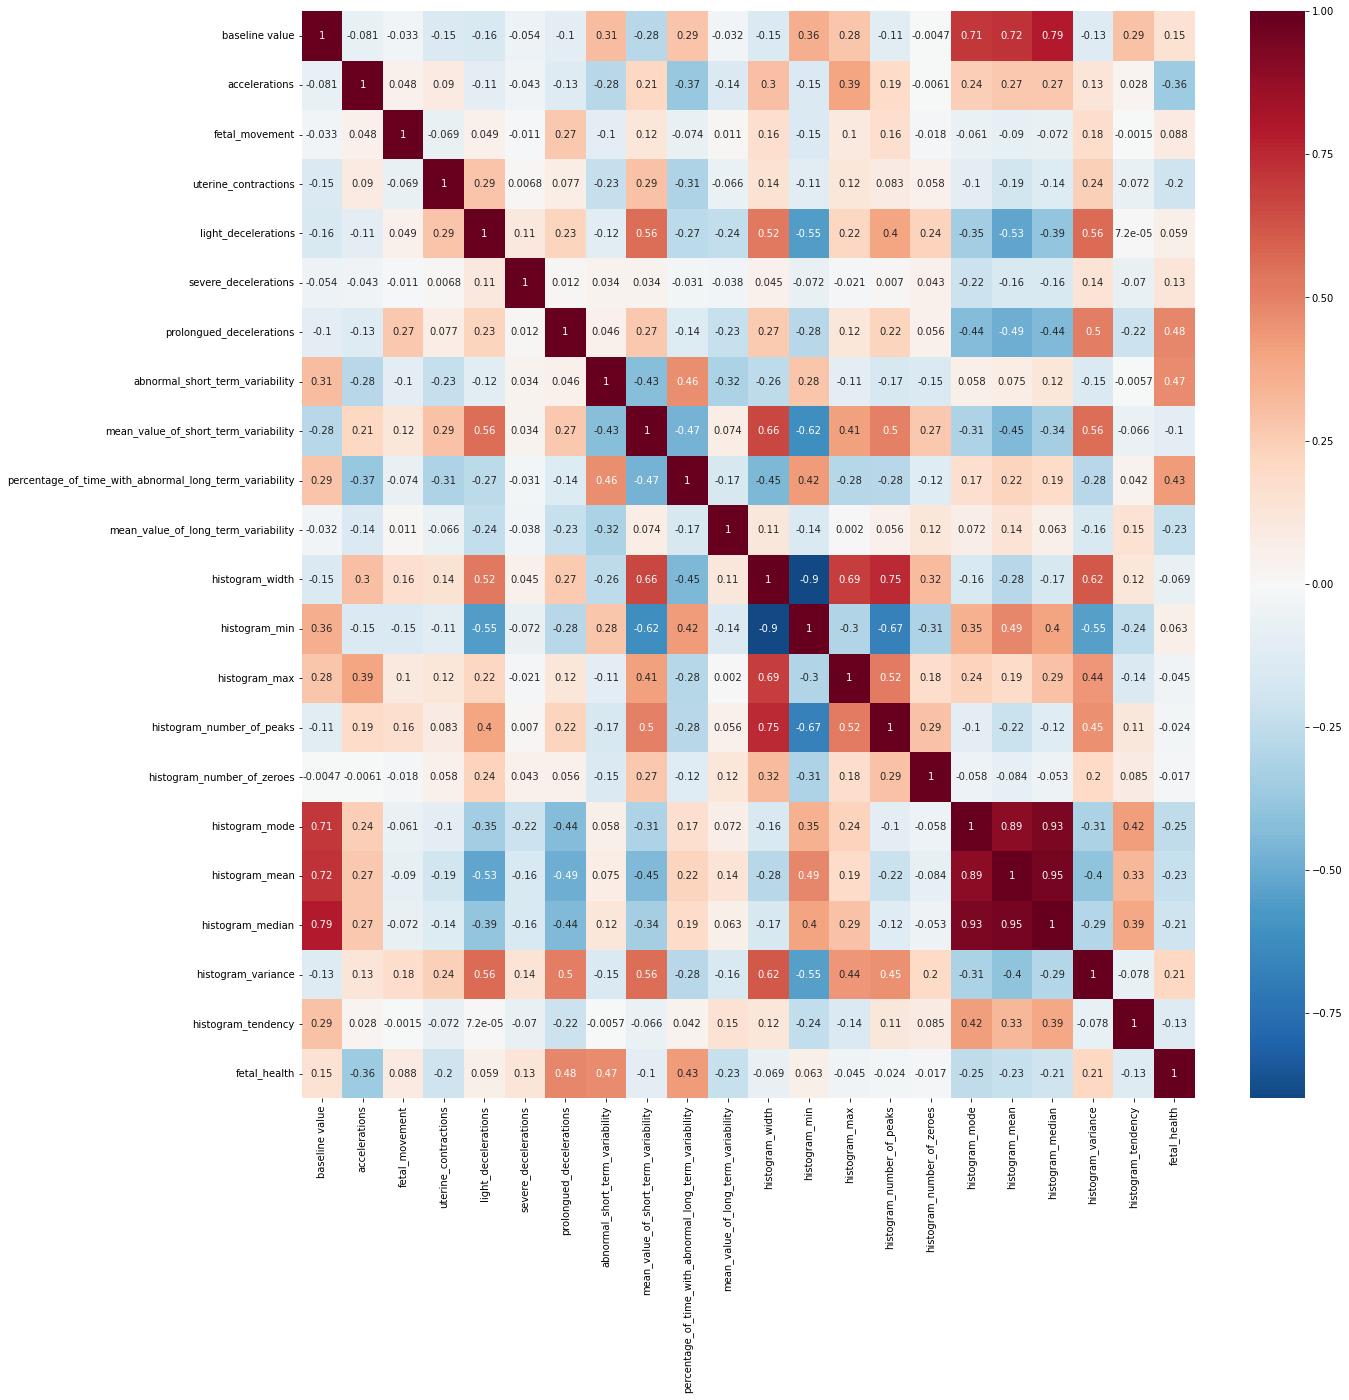

In [22]:
corr = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='RdBu_r', center=0)
plt.show()

### Exploring Correlations

- Strong collinearity between histogram_mode, mean and median as expected, since mode correlates most with the target variable, I will choose that as feature.
- histogram_width shows strong collinearity with several other features. I prefer to feed the 'raw' data to the models so I will drop histogram_width

Some features describing similar metrics show collinearity, e.g. histogram_min and light_decelerations. Both of these touch on the subject of 'low heart frequency in the fetus'. However, these are different metrics whatsoever and not necessarily connected to each other. A fetus can show a short bradycardia with low heart frequency yet light_decelerations can be rare nonetheless. So I will keep both of these featurs for now.

In [23]:
data.drop(columns=['histogram_mean', 'histogram_median', 'histogram_width'], inplace=True)

### Exploring Data Variance

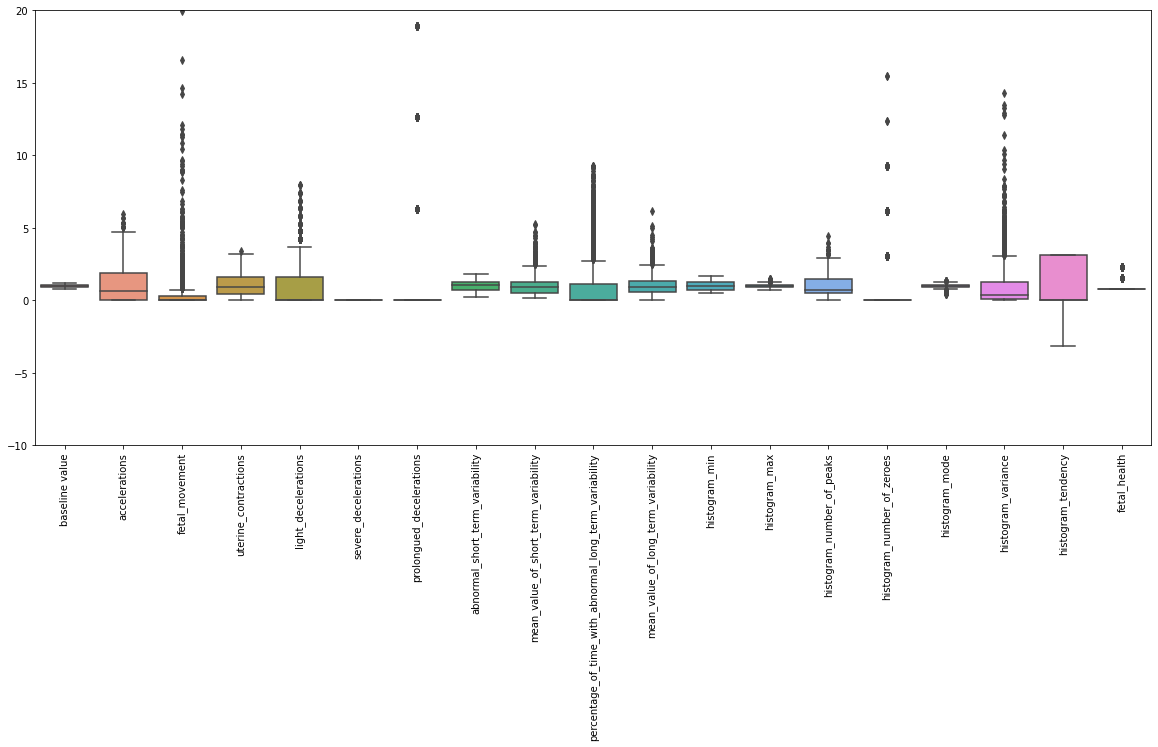

baseline value                                              0.005450
accelerations                                               1.479280
fetal_movement                                             24.227917
uterine_contractions                                        0.455235
light_decelerations                                         2.454525
severe_decelerations                                      302.856739
prolongued_decelerations                                   13.851394
abnormal_short_term_variability                             0.133869
mean_value_of_short_term_variability                        0.439176
percentage_of_time_with_abnormal_long_term_variability      3.490683
mean_value_of_long_term_variability                         0.472531
histogram_min                                               0.099782
histogram_max                                               0.011968
histogram_number_of_peaks                                   0.525603
histogram_number_of_zeroes        

In [24]:
normalized_data = data / data.mean()

fig = plt.figure(figsize=(20, 8))

plot = sns.boxplot(data=normalized_data)
plot.tick_params(axis="x", rotation=90)
plot.set(ylim=(-10, 20))
plt.show()
print(normalized_data.var())

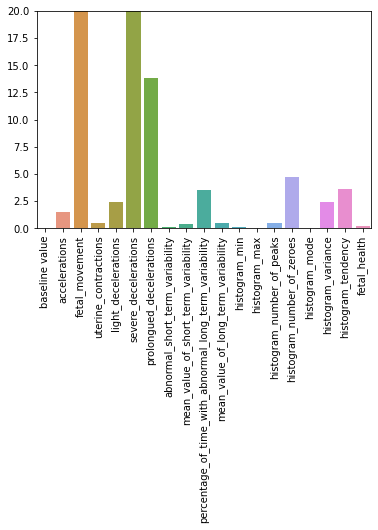

In [25]:
plot = sns.barplot(x=normalized_data.var().index, y=normalized_data.var().values)
plot.tick_params(axis="x", rotation=90)
plot.set(ylim=(0, 20))
plt.show()

In [26]:
print(normalized_data.var()[normalized_data.var() < 0.4])

baseline value                     0.005450
abnormal_short_term_variability    0.133869
histogram_min                      0.099782
histogram_max                      0.011968
histogram_mode                     0.014203
fetal_health                       0.221869
dtype: float64


Above features show signifanctly lower variance than the rest of the features. I suspect that these do not add much information in terms of discriminability between the target classes. They will be therefore dropped to reduce dimensionality in the dataset and avoid overfitting later down the line. `prolonged_decelerations` as well as `severe_decelerations` show higher variance, but on visual exploration of their distribution, this is mainly due to some outliers in the data. Therefore these will be dropped as well.


In [27]:
data.drop(
    columns=[
        "baseline value",
        "abnormal_short_term_variability",
        "histogram_min",
        "histogram_max",
        "histogram_mode",
        "prolongued_decelerations",
        "severe_decelerations",
    ], inplace=True
)

## Data Clustering

/Users/christian/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


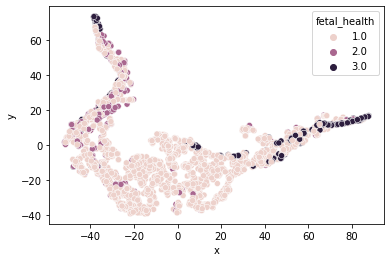

In [28]:
tsne = TSNE(n_components=2, learning_rate="auto", init="pca")
tsne_features = tsne.fit_transform(data)
tsne_df = pd.DataFrame(tsne_features, columns=["x", "y"])
tsne_df = tsne_df.join(data["fetal_health"])
sns.scatterplot(x="x", y="y", hue="fetal_health", data=tsne_df)
plt.show()

Especially the pathological samples seem to cluster at the more extreme end of the data range. The suspect samples also seem to cluster on the lower extreme end of the cluster and do rarely show up in the center of the group or in the higher cluster. This all in all shows some discriminability between the target classes. Furhter investigation of the cluster might be interested but will not be part of this investigatio. 

In [29]:
data.shape

(2126, 12)

## Model Development

### Data Preparation

In [30]:
# the following function is taken from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None,train_sizes=np.linspace(0.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

        - None, to use the default 5-fold cross-validation,
        - integer, to specify the number of folds.
        - :term:`CV splitter`,
        - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

def get_classification_report(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(classification_report(y_test, predictions))
    
def simple_fit_score(X_train, X_test, y_train, y_test, model, n, importance=False):
    model_name = type(model).__name__
    cv_score = cross_val_score(model, X_train, y_train, cv=n, scoring="balanced_accuracy")
    print(f'Scores for {model_name}')
    print('Maximum Score: ', cv_score.max())
    print('Minimum Score: ', cv_score.min())
    print('Mean Score: ', cv_score.mean())
    if importance:
        model.fit(X_train, y_train)
        
        importances = pd.Series(data=model.feature_importances_, index=X_columns)
        print(importances)
        importances_sorted = importances.sort_values()
        importances_sorted.plot(kind='barh', color='lightgreen')
        plt.title('Feature Importances')
        plt.show()

In [31]:
X = data.drop(columns=["fetal_health"])
y = data["fetal_health"]

scaler = StandardScaler()

X_train_n, X_test_n, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=808)

X_train = scaler.fit_transform(X_train_n)
X_test = scaler.transform(X_test_n)
 
X_columns = X.columns

In [32]:
machines = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "KNC": KNC(),
    "SVC": SVC(kernel="rbf"),
    "DTC": DecisionTreeClassifier(),
    "RFC": RandomForestClassifier(),
    "ABC": AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3, random_state=582), random_state=2896),
    "RBC": GradientBoostingClassifier(n_estimators=250, max_depth=3, random_state=4567)
}

over = SMOTE()

for name, machine in machines.items():
    machines[name] = Pipeline([
        ("over", over),
        ("classifier", machine)
    ])

### Logistic Regression

Scores for Pipeline
Maximum Score:  0.8621010541621229
Minimum Score:  0.7278632478632479
Mean Score:  0.7846569033172086
              precision    recall  f1-score   support

         1.0       0.99      0.80      0.88       349
         2.0       0.43      0.78      0.55        49
         3.0       0.39      0.79      0.52        28

    accuracy                           0.79       426
   macro avg       0.60      0.79      0.65       426
weighted avg       0.88      0.79      0.82       426



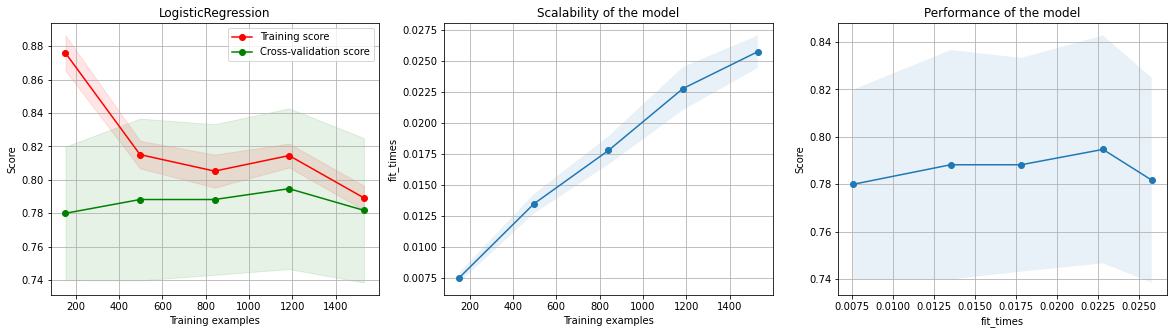

In [33]:
lr = machines["LogisticRegression"]


simple_fit_score(X_train, X_test, y_train, y_test, lr, 10)
get_classification_report(X_train, X_test, y_train, y_test, lr)
plot_learning_curve(lr, 'LogisticRegression', X_train, y_train, cv=10)
plt.show()

### K-Nearest Neighbours

Scores for Pipeline
Maximum Score:  0.8433660487095601
Minimum Score:  0.736068376068376
Mean Score:  0.7938781701758801
              precision    recall  f1-score   support

         1.0       0.96      0.82      0.88       349
         2.0       0.41      0.73      0.53        49
         3.0       0.53      0.82      0.65        28

    accuracy                           0.81       426
   macro avg       0.64      0.79      0.69       426
weighted avg       0.87      0.81      0.83       426



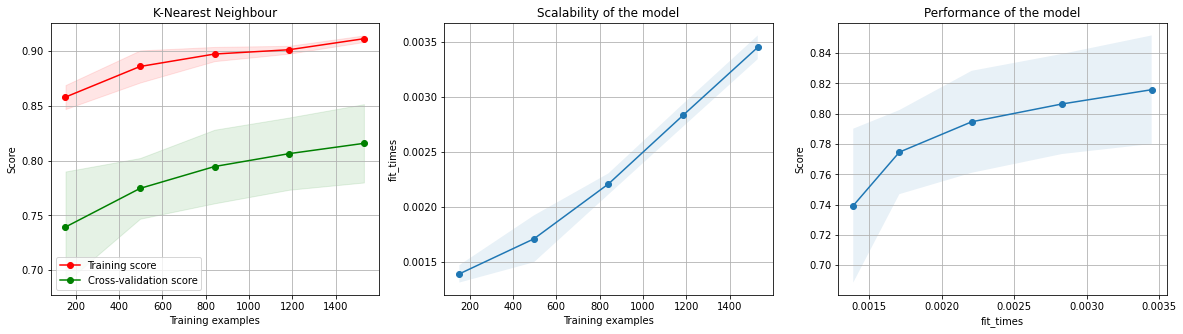

In [34]:
knc = machines["KNC"]
simple_fit_score(X_train, X_test, y_train, y_test, knc, 10)
get_classification_report(X_train, X_test, y_train, y_test, knc)
plot_learning_curve(knc, 'K-Nearest Neighbour', X_train, y_train, cv=10)
plt.show()

### Support Vector Machine

Scores for Pipeline
Maximum Score:  0.8775869380831214
Minimum Score:  0.7830769230769231
Mean Score:  0.8272652089216976
              precision    recall  f1-score   support

         1.0       0.97      0.83      0.90       349
         2.0       0.44      0.86      0.58        49
         3.0       0.67      0.79      0.72        28

    accuracy                           0.83       426
   macro avg       0.69      0.82      0.73       426
weighted avg       0.89      0.83      0.85       426



<module 'matplotlib.pyplot' from '/Users/christian/anaconda3/envs/data/lib/python3.10/site-packages/matplotlib/pyplot.py'>

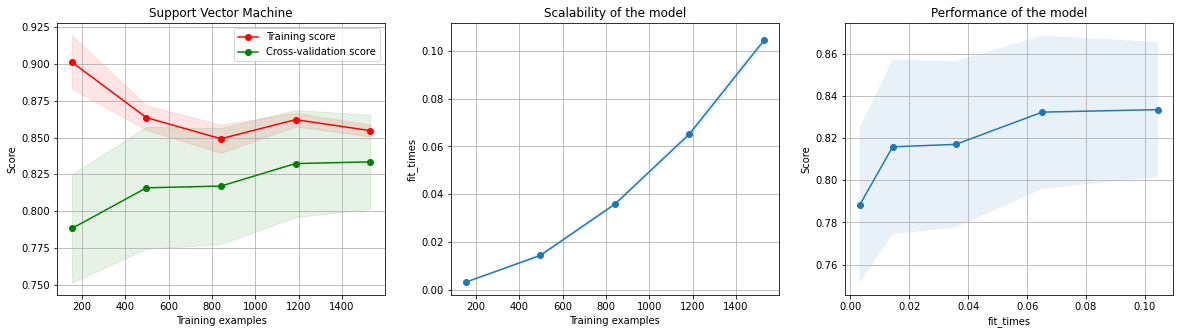

In [35]:
svc = machines["SVC"]
simple_fit_score(X_train, X_test, y_train, y_test, svc, 10)
get_classification_report(X_train, X_test, y_train, y_test, svc)
plot_learning_curve(svc, 'Support Vector Machine', X_train, y_train, cv=10)

### Decision Tree Classifier

Scores for Pipeline
Maximum Score:  0.8652991452991453
Minimum Score:  0.7088404216648492
Mean Score:  0.7978058887677207
              precision    recall  f1-score   support

         1.0       0.96      0.93      0.94       349
         2.0       0.58      0.59      0.59        49
         3.0       0.62      0.82      0.71        28

    accuracy                           0.88       426
   macro avg       0.72      0.78      0.75       426
weighted avg       0.89      0.88      0.89       426



<module 'matplotlib.pyplot' from '/Users/christian/anaconda3/envs/data/lib/python3.10/site-packages/matplotlib/pyplot.py'>

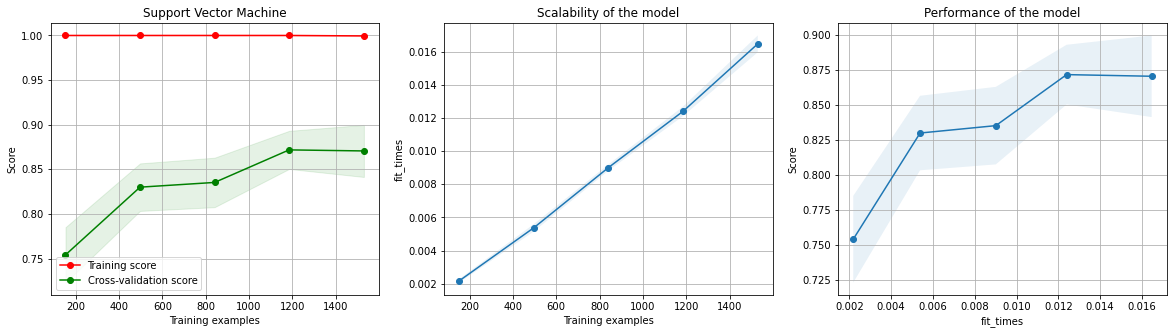

In [38]:
dt = machines["DTC"]

simple_fit_score(X_train_n, X_test_n, y_train, y_test, dt, 10)
get_classification_report(X_train_n, X_test_n, y_train, y_test, dt)
plot_learning_curve(dt, 'Support Vector Machine', X_train, y_train, cv=10)

### Random Forest Classifier

Scores for Pipeline
Maximum Score:  0.8690598290598291
Minimum Score:  0.732053798618684
Mean Score:  0.8266509427807136
              precision    recall  f1-score   support

         1.0       0.96      0.95      0.95       349
         2.0       0.71      0.71      0.71        49
         3.0       0.77      0.82      0.79        28

    accuracy                           0.92       426
   macro avg       0.81      0.83      0.82       426
weighted avg       0.92      0.92      0.92       426



<module 'matplotlib.pyplot' from '/Users/christian/anaconda3/envs/data/lib/python3.10/site-packages/matplotlib/pyplot.py'>

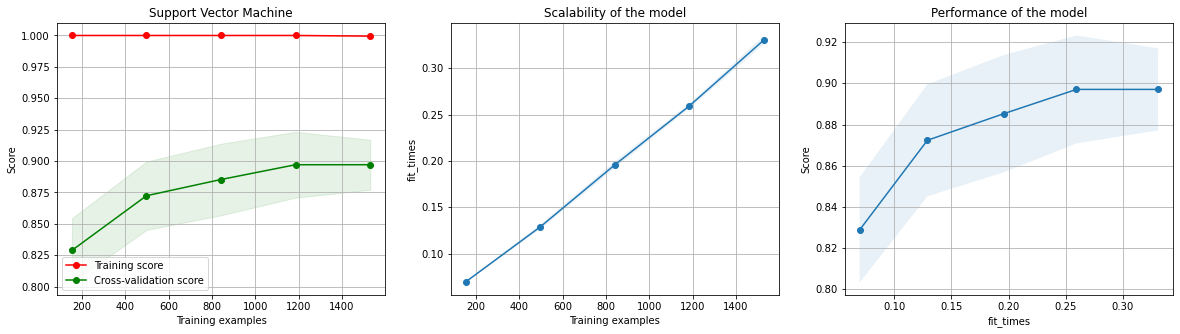

In [41]:
rf = machines["RFC"]

simple_fit_score(X_train_n, X_test_n, y_train, y_test, rf, 10)
get_classification_report(X_train_n, X_test_n, y_train, y_test, rf)
plot_learning_curve(rf, 'Support Vector Machine', X_train, y_train, cv=10)